In [912]:
##Cluster 1
##Cluster 2
##Cluster 3
##Cluster 4
##Cluster 5
##Cluster 6
##Cluster 7


In [913]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline  

In [914]:
# The code was removed by DSX for sharing.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1235 entries, 0 to 1234
Data columns (total 43 columns):
Unnamed: 0                   1235 non-null int64
0                            1235 non-null float64
1                            1235 non-null float64
2                            1235 non-null float64
3                            1235 non-null float64
4                            1235 non-null float64
Area Desc                    1228 non-null object
Category                     1235 non-null object
Clinical indication          1178 non-null object
Clinical indication desc     1178 non-null object
Cluster2                     688 non-null float64
Cluster2_Predict             883 non-null float64
Cluster3                     688 non-null float64
Combined                     1235 non-null object
Country                      1235 non-null object
Country_dim_corp             1235 non-null object
FPI/FSI Date_corp            1235 non-null float64
FPI/FSI Date_country         1235 non-

In [915]:
df_data_raw.where(df_data_raw['Combined'] == 'EFC14835 USA CSU').dropna(subset =['Combined'])

,Unnamed: 0,0,1,2,3,4,Area Desc,Category,Clinical indication,Clinical indication desc,...,Study,Study Phase,Therapeutic area,Unnamed: 0_corp,Unnamed: 0_country,c_rate,y_area_numeric,y_country_numeric,y_phase_numeric,y_prior_numeric
1126,809,0,0.014815,0.274074,0,0,Alimentary & Metabolism,G,T2D,Type 2 Diabetes,...,EFC14835,III,TA/A,13077,13141,0.606796,7,62,1,8


In [916]:
#reference as index

df_data_ref = df_data_raw
df_data_ref.index = df_data_ref['Combined'].copy()

In [917]:
df_data_ref.drop_duplicates(keep='last', inplace=True)

In [918]:
df_data_ref['datetime fpi'] = df_data_ref['FPI/FSI_country'].apply(np.datetime64)

In [919]:
np.datetime64('2013-03-13')

numpy.datetime64('2013-03-13')

In [920]:
df_data_raw[['Combined', '0', '1', '2', '3', '4', 'c_rate','Cluster2_Predict']].head()

,Combined,0,1,2,3,4,c_rate,Cluster2_Predict
Combined,,,,,,,,
ACT12339 France CSU,ACT12339 France CSU,0,0.000000,0.000000,0.000000,1,1,1
ACT12340 Belgium,ACT12340 Belgium,0,0.000000,0.000000,0.588235,1,1,4
ACT12340 Spain,ACT12340 Spain,0,0.222222,0.555556,0.722222,1,1,6
ACT12340 USA CSU,ACT12340 USA CSU,0,0.000000,0.066667,0.200000,1,1,2
ACT12688 USA Corporate,ACT12688 USA Corporate,0,0.035714,0.178571,0.571429,1,1,2


In [921]:
df_data_raw[['Combined', '0', '1', '2', '3', '4', 'c_rate','Cluster2_Predict']].where(df_data_raw['Combined'] == 'EFC14835 USA CSU').dropna(subset =['Combined'])

,Combined,0,1,2,3,4,c_rate,Cluster2_Predict
Combined,,,,,,,,
EFC14835 USA CSU,EFC14835 USA CSU,0,0.014815,0.274074,0,0,0.606796,2


In [922]:
df_data_raw.groupby(['Cluster2_Predict'])['Combined'].count()

Cluster2_Predict
1     48
2    153
3     79
4     33
5    254
6    195
7    121
Name: Combined, dtype: int64

### Cluster 1

In [923]:
df_data_1 = df_data_raw[['Combined', '0', '1', '2', '3', '4']].where((df_data_raw['Cluster2_Predict'] == 1) & (df_data_raw['c_rate'] == 1)).dropna().copy()

<function matplotlib.pyplot.show>

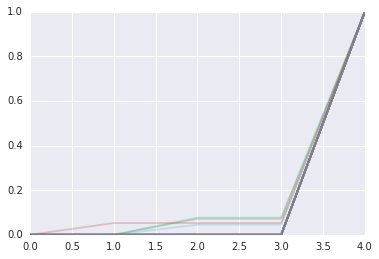

In [924]:
plt.plot(df_data_1.T.iloc[1:], alpha=0.3)

plt.show

In [925]:
df_data_1_melt = pd.melt(df_data_1, id_vars=['Combined'], value_vars=['0','1','2','3','4'])
df_data_1_melt = df_data_1_melt.sort_values(by=['Combined', 'variable']).copy()
df_data_1_melt.head()

,Combined,variable,value
0,ACT12339 France CSU,0,0
46,ACT12339 France CSU,1,0
92,ACT12339 France CSU,2,0
138,ACT12339 France CSU,3,0
184,ACT12339 France CSU,4,1


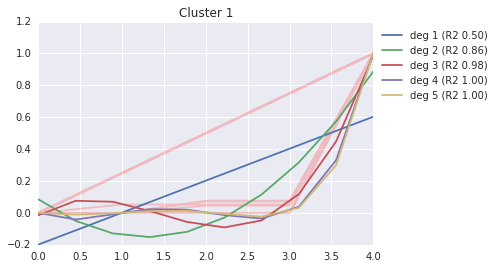

In [977]:
#df_data_pe_1['intercept'] = 1
X = df_data_1_melt['variable'].to_frame()
y = df_data_1_melt['value'].to_frame()

#df_pivot_T[[1,2,3,4]].where(df_pivot_T['Cluster2'] == 2).T

#~~~~~~~~~~~~test
#max_count = len(df_pivot_T_Combo['Period Index'])
#X_reg = X[::5]

#y_reg = y[::1]
#~~~~~~~~~~~

d2 = np.linspace(0, 1, 9)
domain = np.linspace(0, 3 + 1, 10)
#X = np.array([x_sample]).T

f = plt.plot(X, y, 'r-', alpha=.2)
#f = plt.plot(X_reg, y_reg, 'bo')


for degree in [1, 2, 3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y)
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=1, label="deg %d (R2 %.2f)" % (degree, model.score(X, y)))
#   model = LinearRegression().fit(X, y)
plt.title("Cluster 1")
#for degree in [1, 2, 3, 4, 5]:
  #  model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X_reg, y_reg)
 #   y_pred = model.predict(np.array([domain]).T)
#    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X, y)))
    
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()
plt.close(1) 
#print y_pred

In [927]:
#list of cluster 1 strudies
combined_1_predict = df_data_raw['Combined'].where((df_data_raw['Cluster2_Predict'] == 1) & (df_data_raw['c_rate'] <> 1)).dropna().unique()
df_data_1_predicted = pd.concat([pd.DataFrame({'Combined':x,
                                               'Date':pd.date_range(df_data_ref['datetime fpi'].loc[x], periods=int(df_data_ref['Month_Count'].loc[x] + 1), freq='M',normalize=True),
                                               'Val': range(0, int(df_data_ref['Month_Count'].loc[x].mean() + 1)), 
                                               'domain': np.linspace(0, 4, int(df_data_ref['Month_Count'].loc[x] + 1))}) for x in combined_1_predict], ignore_index=True)
df_data_1_predicted['Predicted'] = model.predict(df_data_1_predicted['domain'].to_frame())
df_data_1_predicted['rate'] = df_data_1_predicted['Predicted'] / 1
df_data_1_predicted['rate_shifted'] = df_data_1_predicted.groupby(by=['Combined'])['rate'].transform('shift').fillna(0)
df_data_1_predicted['rate_m'] = df_data_1_predicted['rate'] - df_data_1_predicted['rate_shifted']
df_data_1_predicted['Cluster2'] = 1
df_data_1_predicted.head(40)

,Combined,Date,Val,domain,Predicted,rate,rate_shifted,rate_m,Cluster2
0,LTS13972 USA CSU,2012-03-31,0,0.000000,-2.664535e-15,-2.664535e-15,0.000000e+00,-2.664535e-15,1
1,LTS13972 USA CSU,2012-04-30,1,0.036364,-1.541269e-03,-1.541269e-03,-2.664535e-15,-1.541269e-03,1
2,LTS13972 USA CSU,2012-05-31,2,0.072727,-2.996661e-03,-2.996661e-03,-1.541269e-03,-1.455392e-03,1
3,LTS13972 USA CSU,2012-06-30,3,0.109091,-4.353163e-03,-4.353163e-03,-2.996661e-03,-1.356502e-03,1
4,LTS13972 USA CSU,2012-07-31,4,0.145455,-5.599557e-03,-5.599557e-03,-4.353163e-03,-1.246394e-03,1
5,LTS13972 USA CSU,2012-08-31,5,0.181818,-6.726353e-03,-6.726353e-03,-5.599557e-03,-1.126796e-03,1
6,LTS13972 USA CSU,2012-09-30,6,0.218182,-7.725721e-03,-7.725721e-03,-6.726353e-03,-9.993674e-04,1
7,LTS13972 USA CSU,2012-10-31,7,0.254545,-8.591423e-03,-8.591423e-03,-7.725721e-03,-8.657020e-04,1
8,LTS13972 USA CSU,2012-11-30,8,0.290909,-9.318749e-03,-9.318749e-03,-8.591423e-03,-7.273263e-04,1
9,LTS13972 USA CSU,2012-12-31,9,0.327273,-9.904449e-03,-9.904449e-03,-9.318749e-03,-5.856995e-04,1


### CLuster 2

In [928]:
df_data_2 = df_data_raw[['Combined', '0', '1', '2', '3', '4']].where((df_data_raw['Cluster2_Predict'] == 2) & (df_data_raw['c_rate'] == 1)).dropna().copy()

In [929]:
df_data_2.set_index(df_data_2['Combined'], inplace=True)

In [930]:
df_data_2.iloc[:, 1:].head()

,0,1,2,3,4
Combined,,,,,
ACT12340 USA CSU,0,0.000000,0.066667,0.200000,1
ACT12688 USA Corporate,0,0.035714,0.178571,0.571429,1
ACT13480 Turkey,0,0.062500,0.250000,0.375000,1
ARD10248 UK CSU,0,0.000000,0.000000,0.200000,1
ARD12181 USA CSU,0,0.030303,0.272727,0.545455,1


In [931]:
df_data_pivot = pd.melt(df_data_2, id_vars=['Combined'], value_vars=['0','1','2','3','4'])

In [932]:
df_data_pivot = df_data_pivot.sort_values(by=['Combined', 'variable']).copy()
df_data_pivot.head(10)

,Combined,variable,value
0,ACT12340 USA CSU,0,0.000000
119,ACT12340 USA CSU,1,0.000000
238,ACT12340 USA CSU,2,0.066667
357,ACT12340 USA CSU,3,0.200000
476,ACT12340 USA CSU,4,1.000000
1,ACT12688 USA Corporate,0,0.000000
120,ACT12688 USA Corporate,1,0.035714
239,ACT12688 USA Corporate,2,0.178571
358,ACT12688 USA Corporate,3,0.571429
477,ACT12688 USA Corporate,4,1.000000


<function matplotlib.pyplot.show>

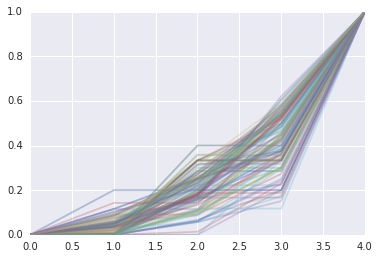

In [933]:
plt.plot(df_data_2.T.iloc[1:], alpha=0.3)

plt.show

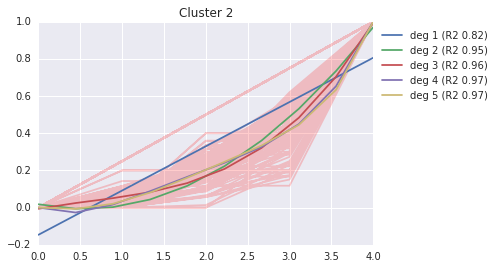

In [976]:
#df_data_pe_1['intercept'] = 1
X = df_data_pivot['variable'].to_frame()
y = df_data_pivot['value'].to_frame()

#df_pivot_T[[1,2,3,4]].where(df_pivot_T['Cluster2'] == 2).T

#~~~~~~~~~~~~test
#max_count = len(df_pivot_T_Combo['Period Index'])
#X_reg = X[::5]

#y_reg = y[::1]
#~~~~~~~~~~~

d2 = np.linspace(0, 1, 9)
domain = np.linspace(0, 3 + 1, 10)
#X = np.array([x_sample]).T

f = plt.plot(X, y, 'r-', alpha=.2)
#f = plt.plot(X_reg, y_reg, 'bo')

for degree in [1, 2, 3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y)
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=1, label="deg %d (R2 %.2f)" % (degree, model.score(X, y)))
#   model = LinearRegression().fit(X, y)
plt.title("Cluster 2")
#for degree in [1, 2, 3, 4, 5]:
  #  model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X_reg, y_reg)
 #   y_pred = model.predict(np.array([domain]).T)
#    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X, y)))
    
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()
plt.close(1) 
#print y_pred

In [935]:
#list of cluster 2 strudies
combined_2_predict = df_data_raw['Combined'].where((df_data_raw['Cluster2_Predict'] == 2) & (df_data_raw['c_rate'] <> 1)).dropna().unique()
df_data_2_predicted = pd.concat([pd.DataFrame({'Combined':x,
                                               'Date':pd.date_range(df_data_ref['datetime fpi'].loc[x], periods=int(df_data_ref['Month_Count'].loc[x] + 1), freq='M',normalize=True),
                                               'Val': range(0, int(df_data_ref['Month_Count'].loc[x].mean() + 1)), 
                                               'domain': np.linspace(0, 4, int(df_data_ref['Month_Count'].loc[x] + 1))}) for x in combined_2_predict], ignore_index=True)
df_data_2_predicted['Predicted'] = model.predict(df_data_2_predicted['domain'].to_frame())
df_data_2_predicted['rate'] = df_data_2_predicted['Predicted'] / 1
df_data_2_predicted['rate_shifted'] = df_data_2_predicted.groupby(by=['Combined'])['rate'].transform('shift').fillna(0)
df_data_2_predicted['rate_m'] = df_data_2_predicted['rate'] - df_data_2_predicted['rate_shifted']
df_data_2_predicted['Cluster2'] = 2
df_data_2_predicted.head()

,Combined,Date,Val,domain,Predicted,rate,rate_shifted,rate_m,Cluster2
0,EFC14280 Israel,2017-06-30,0,0,3.941292e-15,3.941292e-15,0.000000e+00,3.941292e-15,2
1,EFC14280 Israel,2017-07-31,1,1,3.288511e-02,3.288511e-02,3.941292e-15,3.288511e-02,2
2,EFC14280 Israel,2017-08-31,2,2,2.030911e-01,2.030911e-01,3.288511e-02,1.702060e-01,2
3,EFC14280 Israel,2017-09-30,3,3,4.126606e-01,4.126606e-01,2.030911e-01,2.095695e-01,2
4,EFC14280 Israel,2017-10-31,4,4,1.000000e+00,1.000000e+00,4.126606e-01,5.873394e-01,2


### Cluster 3

In [936]:
df_data_3 = df_data_raw[['Combined', '0', '1', '2', '3', '4']].where((df_data_raw['Cluster2_Predict'] == 3) & (df_data_raw['c_rate'] == 1)).dropna().copy()

<function matplotlib.pyplot.show>

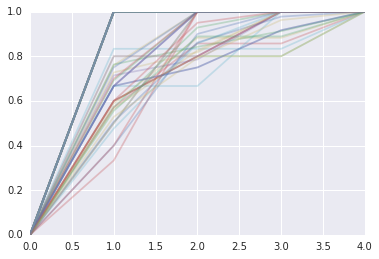

In [937]:
plt.plot(df_data_3.T.iloc[1:], alpha=0.3)

plt.show

In [938]:
df_data_3_melt = pd.melt(df_data_3, id_vars=['Combined'], value_vars=['0','1','2','3','4'])
df_data_3_melt = df_data_3_melt.sort_values(by=['Combined', 'variable']).copy()
df_data_3_melt.head(10)

,Combined,variable,value
0,ACT13480 France CSU,0,0.000000
64,ACT13480 France CSU,1,0.666667
128,ACT13480 France CSU,2,1.000000
192,ACT13480 France CSU,3,1.000000
256,ACT13480 France CSU,4,1.000000
1,ACT13480 Italy CSU,0,0.000000
65,ACT13480 Italy CSU,1,0.600000
129,ACT13480 Italy CSU,2,0.800000
193,ACT13480 Italy CSU,3,0.800000
257,ACT13480 Italy CSU,4,1.000000


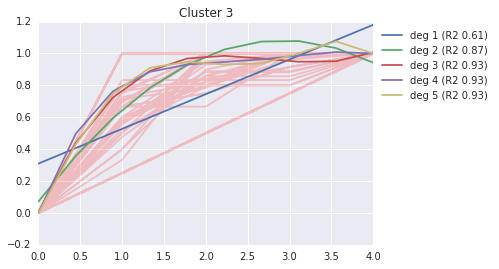

In [975]:
#df_data_pe_1['intercept'] = 1
X = df_data_3_melt['variable'].to_frame()
y = df_data_3_melt['value'].to_frame()

#df_pivot_T[[1,2,3,4]].where(df_pivot_T['Cluster2'] == 2).T

#~~~~~~~~~~~~test
#max_count = len(df_pivot_T_Combo['Period Index'])
#X_reg = X[::5]

#y_reg = y[::1]
#~~~~~~~~~~~

d2 = np.linspace(0, 1, 9)
domain = np.linspace(0, 3 + 1, 10)
#X = np.array([x_sample]).T

f = plt.plot(X, y, 'r-', alpha=.2)
#f = plt.plot(X_reg, y_reg, 'bo')


for degree in [1, 2, 3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y)
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=1, label="deg %d (R2 %.2f)" % (degree, model.score(X, y)))
#   model = LinearRegression().fit(X, y)

#for degree in [1, 2, 3, 4, 5]:
  #  model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X_reg, y_reg)
 #   y_pred = model.predict(np.array([domain]).T)
#    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X, y)))
plt.title("Cluster 3")
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()
plt.close(1) 
#print y_pred

In [940]:
#list of cluster 3 strudies
combined_3_predict = df_data_raw['Combined'].where((df_data_raw['Cluster2_Predict'] == 3) & (df_data_raw['c_rate'] <> 1)).dropna().unique()
df_data_3_predicted = pd.concat([pd.DataFrame({'Combined':x,
                                               'Date':pd.date_range(df_data_ref['datetime fpi'].loc[x], periods=int(df_data_ref['Month_Count'].loc[x]+ 1), freq='M',normalize=True),
                                               'Val': range(0, int(df_data_ref['Month_Count'].loc[x].mean() + 1)), 
                                               'domain': np.linspace(0, 4, int(df_data_ref['Month_Count'].loc[x] + 1))}) for x in combined_3_predict], ignore_index=True)
df_data_3_predicted['Predicted'] = model.predict(df_data_3_predicted['domain'].to_frame())
df_data_3_predicted['rate'] = df_data_3_predicted['Predicted'] / 1
df_data_3_predicted['rate_shifted'] = df_data_3_predicted.groupby(by=['Combined'])['rate'].transform('shift').fillna(0)
df_data_3_predicted['rate_m'] = df_data_3_predicted['rate'] - df_data_3_predicted['rate_shifted']
df_data_3_predicted['Cluster2'] = 3
df_data_3_predicted.head()

,Combined,Date,Val,domain,Predicted,rate,rate_shifted,rate_m,Cluster2
0,DFI12712 Netherlands,2016-10-31,0,0.0,-4.796163e-14,-4.796163e-14,0.000000e+00,-4.796163e-14,3
1,DFI12712 Netherlands,2016-11-30,1,0.2,1.989444e-01,1.989444e-01,-4.796163e-14,1.989444e-01,3
2,DFI12712 Netherlands,2016-12-31,2,0.4,3.892130e-01,3.892130e-01,1.989444e-01,1.902685e-01,3
3,DFI12712 Netherlands,2017-01-31,3,0.6,5.578860e-01,5.578860e-01,3.892130e-01,1.686730e-01,3
4,DFI12712 Netherlands,2017-02-28,4,0.8,6.971794e-01,6.971794e-01,5.578860e-01,1.392934e-01,3


### cluster 4

In [941]:
df_data_4 = df_data_raw[['Combined', '0', '1', '2', '3', '4']].where((df_data_raw['Cluster2_Predict'] == 4) & (df_data_raw['c_rate'] == 1)).dropna().copy()

In [942]:
df_data_4_melt = pd.melt(df_data_4, id_vars=['Combined'], value_vars=['0','1','2','3','4'])
df_data_4_melt = df_data_4_melt.sort_values(by=['Combined', 'variable']).copy()
df_data_4_melt.head(10)

,Combined,variable,value
0,ACT12340 Belgium,0,0.000000
25,ACT12340 Belgium,1,0.000000
50,ACT12340 Belgium,2,0.000000
75,ACT12340 Belgium,3,0.588235
100,ACT12340 Belgium,4,1.000000
1,ARD11936 USA CSU,0,0.000000
26,ARD11936 USA CSU,1,0.000000
51,ARD11936 USA CSU,2,0.000000
76,ARD11936 USA CSU,3,0.870968
101,ARD11936 USA CSU,4,1.000000


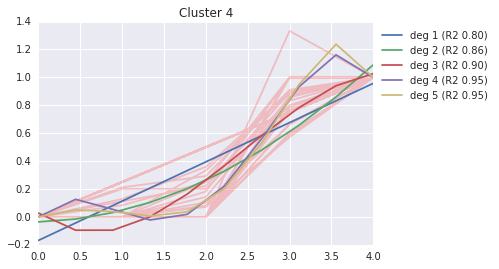

In [974]:
#df_data_pe_1['intercept'] = 1
X = df_data_4_melt['variable'].to_frame()
y = df_data_4_melt['value'].to_frame()

#df_pivot_T[[1,2,3,4]].where(df_pivot_T['Cluster2'] == 2).T

#~~~~~~~~~~~~test
#max_count = len(df_pivot_T_Combo['Period Index'])
#X_reg = X[::5]

#y_reg = y[::1]
#~~~~~~~~~~~

d2 = np.linspace(0, 1, 9)
domain = np.linspace(0, 3 + 1, 10)
#X = np.array([x_sample]).T

f = plt.plot(X, y, 'r-', alpha=.2)
#f = plt.plot(X_reg, y_reg, 'bo')


for degree in [1, 2, 3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y)
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=1, label="deg %d (R2 %.2f)" % (degree, model.score(X, y)))
#   model = LinearRegression().fit(X, y)
plt.title("Cluster 4")
#for degree in [1, 2, 3, 4, 5]:
  #  model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X_reg, y_reg)
 #   y_pred = model.predict(np.array([domain]).T)
#    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X, y)))
    
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()
plt.close(1) 
#print y_pred

In [944]:
#pick the right one
model = make_pipeline(PolynomialFeatures(3), LinearRegression()).fit(X, y)

In [945]:
combined_4_predict = df_data_raw['Combined'].where((df_data_raw['Cluster2_Predict'] == 4) & (df_data_raw['c_rate'] <> 1)).dropna().unique()

In [946]:
df_data_4_predicted = pd.concat([pd.DataFrame({'Combined':x,
                                               'Date':pd.date_range(df_data_ref['datetime fpi'].loc[x], periods=int(df_data_ref['Month_Count'].loc[x] + 1), freq='M',normalize=True),
                                               'Val': range(0, int(df_data_ref['Month_Count'].loc[x].mean() + 1)), 
                                               'domain': np.linspace(0, 4, int(df_data_ref['Month_Count'].loc[x] + 1))}) for x in combined_4_predict], ignore_index=True)


In [947]:
df_data_4_predicted['Predicted'] = model.predict(df_data_4_predicted['domain'].to_frame())
df_data_4_predicted['rate'] = df_data_4_predicted['Predicted'] / 1
df_data_4_predicted['rate_shifted'] = df_data_4_predicted.groupby(by=['Combined'])['rate'].transform('shift').fillna(0)
df_data_4_predicted['rate_m'] = df_data_4_predicted['rate'] - df_data_4_predicted['rate_shifted']
df_data_4_predicted['Cluster2'] = 4
df_data_4_predicted.head()

,Combined,Date,Val,domain,Predicted,rate,rate_shifted,rate_m,Cluster2
0,EFC11759 Netherlands,2017-04-30,0,0.000000,0.027090,0.027090,0.000000,0.027090,4
1,EFC11759 Netherlands,2017-05-31,1,0.571429,-0.106619,-0.106619,0.027090,-0.133709,4
2,EFC11759 Netherlands,2017-06-30,2,1.142857,-0.050322,-0.050322,-0.106619,0.056296,4
3,EFC11759 Netherlands,2017-07-31,3,1.714286,0.137290,0.137290,-0.050322,0.187612,4
4,EFC11759 Netherlands,2017-08-31,4,2.285714,0.397527,0.397527,0.137290,0.260237,4


### Cluster 5

In [948]:
df_data_5 = df_data_raw[['Combined', '0', '1', '2', '3', '4']].where((df_data_raw['Cluster2_Predict'] == 5) & (df_data_raw['c_rate'] == 1)).dropna().copy()

In [949]:
df_data_5_melt = pd.melt(df_data_5, id_vars=['Combined'], value_vars=['0','1','2','3','4'])
df_data_5_melt = df_data_5_melt.sort_values(by=['Combined', 'variable']).copy()
df_data_5_melt.head(10)

,Combined,variable,value
0,ACT13480 USA CSU,0,0.000000
198,ACT13480 USA CSU,1,0.100000
396,ACT13480 USA CSU,2,0.400000
594,ACT13480 USA CSU,3,0.500000
792,ACT13480 USA CSU,4,1.000000
1,ACT13710 Japan,0,0.000000
199,ACT13710 Japan,1,0.142857
397,ACT13710 Japan,2,0.285714
595,ACT13710 Japan,3,0.785714
793,ACT13710 Japan,4,1.000000


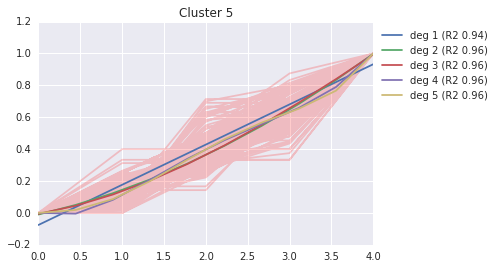

In [971]:
#df_data_pe_1['intercept'] = 1
X = df_data_5_melt['variable'].to_frame()
y = df_data_5_melt['value'].to_frame()

#df_pivot_T[[1,2,3,4]].where(df_pivot_T['Cluster2'] == 2).T

#~~~~~~~~~~~~test
#max_count = len(df_pivot_T_Combo['Period Index'])
#X_reg = X[::5]

#y_reg = y[::1]
#~~~~~~~~~~~

d2 = np.linspace(0, 1, 9)
domain = np.linspace(0, 3 + 1, 10)
#X = np.array([x_sample]).T

f = plt.plot(X, y, 'r-', alpha=.2)
#f = plt.plot(X_reg, y_reg, 'bo')


for degree in [1, 2, 3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y)
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=1, label="deg %d (R2 %.2f)" % (degree, model.score(X, y)))
#   model = LinearRegression().fit(X, y)
plt.title("Cluster 5")
#for degree in [1, 2, 3, 4, 5]:
  #  model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X_reg, y_reg)
 #   y_pred = model.predict(np.array([domain]).T)
#    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X, y)))
    
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()
plt.close(1) 
#print y_pred

In [951]:
#list of cluster 5 strudies
combined_5_predict = df_data_raw['Combined'].where((df_data_raw['Cluster2_Predict'] == 5) & (df_data_raw['c_rate'] <> 1)).dropna().unique()
df_data_5_predicted = pd.concat([pd.DataFrame({'Combined':x,
                                               'Date':pd.date_range(df_data_ref['datetime fpi'].loc[x], periods=int(df_data_ref['Month_Count'].loc[x] + 1), freq='M',normalize=True),
                                               'Val': range(0, int(df_data_ref['Month_Count'].loc[x].mean() + 1)), 
                                               'domain': np.linspace(0, 4, int(df_data_ref['Month_Count'].loc[x] + 1))}) for x in combined_5_predict], ignore_index=True)
df_data_5_predicted['Predicted'] = model.predict(df_data_5_predicted['domain'].to_frame())
df_data_5_predicted['rate'] = df_data_5_predicted['Predicted'] / 1
df_data_5_predicted['rate_shifted'] = df_data_5_predicted.groupby(by=['Combined'])['rate'].transform('shift').fillna(0)
df_data_5_predicted['rate_m'] = df_data_5_predicted['rate'] - df_data_5_predicted['rate_shifted']
df_data_5_predicted['Cluster2'] = 5
df_data_5_predicted.head()

,Combined,Date,Val,domain,Predicted,rate,rate_shifted,rate_m,Cluster2
0,ACT14604 Poland,2017-03-31,0,0.000000,-4.052314e-15,-4.052314e-15,0.000000e+00,-4.052314e-15,5
1,ACT14604 Poland,2017-04-30,1,0.266667,5.674668e-03,5.674668e-03,-4.052314e-15,5.674668e-03,5
2,ACT14604 Poland,2017-05-31,2,0.533333,2.785545e-02,2.785545e-02,5.674668e-03,2.218078e-02,5
3,ACT14604 Poland,2017-06-30,3,0.800000,6.889372e-02,6.889372e-02,2.785545e-02,4.103827e-02,5
4,ACT14604 Poland,2017-07-31,4,1.066667,1.274022e-01,1.274022e-01,6.889372e-02,5.850848e-02,5


### Cluster 6

In [952]:
df_data_6 = df_data_raw[['Combined', '0', '1', '2', '3', '4']].where((df_data_raw['Cluster2_Predict'] == 6) & (df_data_raw['c_rate'] == 1)).dropna().copy()

In [953]:
df_data_6_melt = pd.melt(df_data_6, id_vars=['Combined'], value_vars=['0','1','2','3','4'])
df_data_6_melt = df_data_6_melt.sort_values(by=['Combined', 'variable']).copy()
df_data_6_melt.head(10)

,Combined,variable,value
0,ACT12340 Spain,0,0.000000
140,ACT12340 Spain,1,0.222222
280,ACT12340 Spain,2,0.555556
420,ACT12340 Spain,3,0.722222
560,ACT12340 Spain,4,1.000000
1,ACT12781 Japan,0,0.000000
141,ACT12781 Japan,1,0.250000
281,ACT12781 Japan,2,0.437500
421,ACT12781 Japan,3,0.656250
561,ACT12781 Japan,4,1.000000


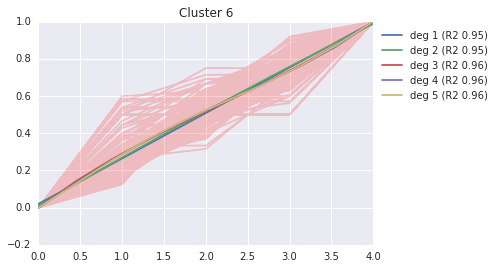

In [972]:
#df_data_pe_1['intercept'] = 1
X = df_data_6_melt['variable'].to_frame()
y = df_data_6_melt['value'].to_frame()

#df_pivot_T[[1,2,3,4]].where(df_pivot_T['Cluster2'] == 2).T

#~~~~~~~~~~~~test
#max_count = len(df_pivot_T_Combo['Period Index'])
#X_reg = X[::5]

#y_reg = y[::1]
#~~~~~~~~~~~

d2 = np.linspace(0, 1, 9)
domain = np.linspace(0, 3 + 1, 10)
#X = np.array([x_sample]).T

f = plt.plot(X, y, 'r-', alpha=.2)
#f = plt.plot(X_reg, y_reg, 'bo')


for degree in [1, 2, 3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y)
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=1, label="deg %d (R2 %.2f)" % (degree, model.score(X, y)))
#   model = LinearRegression().fit(X, y)
plt.title("Cluster 6")
#for degree in [1, 2, 3, 4, 5]:
  #  model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X_reg, y_reg)
 #   y_pred = model.predict(np.array([domain]).T)
#    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X, y)))
    
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()
plt.close(1) 
#print y_pred

In [955]:
#list of cluster 3 strudies
combined_6_predict = df_data_raw['Combined'].where((df_data_raw['Cluster2_Predict'] == 6) & (df_data_raw['c_rate'] <> 1)).dropna().unique()
df_data_6_predicted = pd.concat([pd.DataFrame({'Combined':x,
                                               'Date':pd.date_range(df_data_ref['datetime fpi'].loc[x], periods=int(df_data_ref['Month_Count'].loc[x] + 1), freq='M',normalize=True),
                                               'Val': range(0, int(df_data_ref['Month_Count'].loc[x].mean() + 1)), 
                                               'domain': np.linspace(0, 4, int(df_data_ref['Month_Count'].loc[x] + 1))}) for x in combined_6_predict], ignore_index=True)
df_data_6_predicted['Predicted'] = model.predict(df_data_6_predicted['domain'].to_frame())
df_data_6_predicted['rate'] = df_data_6_predicted['Predicted'] / 1
df_data_6_predicted['rate_shifted'] = df_data_6_predicted.groupby(by=['Combined'])['rate'].transform('shift').fillna(0)
df_data_6_predicted['rate_m'] = df_data_6_predicted['rate'] - df_data_6_predicted['rate_shifted']
df_data_6_predicted['Cluster2'] = 6
df_data_6_predicted.head()

,Combined,Date,Val,domain,Predicted,rate,rate_shifted,rate_m,Cluster2
0,ACT14604 Estonia,2017-02-28,0,0.00,2.631229e-14,2.631229e-14,0.000000e+00,2.631229e-14,6
1,ACT14604 Estonia,2017-03-31,1,0.25,7.030472e-02,7.030472e-02,2.631229e-14,7.030472e-02,6
2,ACT14604 Estonia,2017-04-30,2,0.50,1.442588e-01,1.442588e-01,7.030472e-02,7.395405e-02,6
3,ACT14604 Estonia,2017-05-31,3,0.75,2.177248e-01,2.177248e-01,1.442588e-01,7.346604e-02,6
4,ACT14604 Estonia,2017-06-30,4,1.00,2.880158e-01,2.880158e-01,2.177248e-01,7.029103e-02,6


In [956]:
print df_data_6_predicted.where(df_data_6_predicted['Combined'] == 'OBS13434 Denmark').dropna().head()
print df_data_2_predicted.where(df_data_2_predicted['Combined'] == 'OBS13434 Denmark').dropna().head()

Empty DataFrame
Columns: [Combined, Date, Val, domain, Predicted, rate, rate_shifted, rate_m, Cluster2]
Index: []
Empty DataFrame
Columns: [Combined, Date, Val, domain, Predicted, rate, rate_shifted, rate_m, Cluster2]
Index: []


### Cluster 7

In [957]:
df_data_7 = df_data_raw[['Combined', '0', '1', '2', '3', '4']].where((df_data_raw['Cluster2_Predict'] == 7) & (df_data_raw['c_rate'] == 1)).dropna().copy()

In [958]:
df_data_7_melt = pd.melt(df_data_7, id_vars=['Combined'], value_vars=['0','1','2','3','4'])
df_data_7_melt = df_data_7_melt.sort_values(by=['Combined', 'variable']).copy()
df_data_7_melt.head(10)

,Combined,variable,value
0,ARD10248 Belgium,0,0.0
96,ARD10248 Belgium,1,0.4
192,ARD10248 Belgium,2,0.8
288,ARD10248 Belgium,3,0.8
384,ARD10248 Belgium,4,1.0
1,DFI12860 Hungary,0,0.0
97,DFI12860 Hungary,1,0.5
193,DFI12860 Hungary,2,0.5
289,DFI12860 Hungary,3,1.0
385,DFI12860 Hungary,4,1.0


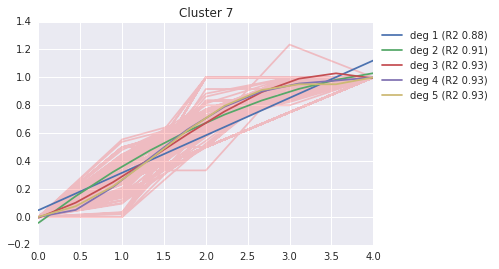

In [973]:
#df_data_pe_1['intercept'] = 1
X = df_data_7_melt['variable'].to_frame()
y = df_data_7_melt['value'].to_frame()

#df_pivot_T[[1,2,3,4]].where(df_pivot_T['Cluster2'] == 2).T

#~~~~~~~~~~~~test
#max_count = len(df_pivot_T_Combo['Period Index'])
#X_reg = X[::5]

#y_reg = y[::1]
#~~~~~~~~~~~

d2 = np.linspace(0, 1, 9)
domain = np.linspace(0, 3 + 1, 10)
#X = np.array([x_sample]).T

f = plt.plot(X, y, 'r-', alpha=.2)
#f = plt.plot(X_reg, y_reg, 'bo')


for degree in [1, 2, 3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y)
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=1, label="deg %d (R2 %.2f)" % (degree, model.score(X, y)))
#   model = LinearRegression().fit(X, y)

#for degree in [1, 2, 3, 4, 5]:
  #  model = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X_reg, y_reg)
 #   y_pred = model.predict(np.array([domain]).T)
#    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X, y)))
plt.title("Cluster 7")
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()
plt.close(1) 
#print y_pred

#deg 2

In [960]:
#pick the right one
model = make_pipeline(PolynomialFeatures(2), LinearRegression()).fit(X, y)

In [961]:
#list of cluster 7 strudies
combined_7_predict = df_data_raw['Combined'].where((df_data_raw['Cluster2_Predict'] == 7) & (df_data_raw['c_rate'] <> 1)).dropna().unique()
df_data_7_predicted = pd.concat([pd.DataFrame({'Combined':x,
                                               'Date':pd.date_range(df_data_ref['datetime fpi'].loc[x], periods=int(df_data_ref['Month_Count'].loc[x] + 1), freq='M',normalize=True),
                                               'Val': range(0, int(df_data_ref['Month_Count'].loc[x].mean() + 1)), 
                                               'domain': np.linspace(0, 4, int(df_data_ref['Month_Count'].loc[x] + 1))}) for x in combined_7_predict], ignore_index=True)
df_data_7_predicted['Predicted'] = model.predict(df_data_7_predicted['domain'].to_frame())
df_data_7_predicted['rate'] = df_data_7_predicted['Predicted'] / 1
#df_data_7_predicted['rate_shifted'] = df_data_7_predicted['rate'].shift(1).fillna(0)
df_data_7_predicted['rate_shifted'] = df_data_7_predicted.groupby(by=['Combined'])['rate'].transform('shift').fillna(0)
df_data_7_predicted['rate_m'] = df_data_7_predicted['rate'] - df_data_7_predicted['rate_shifted']
df_data_7_predicted['Cluster2'] = 7
df_data_7_predicted.head(30)

,Combined,Date,Val,domain,Predicted,rate,rate_shifted,rate_m,Cluster2
0,EFC14028 Italy CSU,2017-04-30,0,0.000000,-0.042872,-0.042872,0.000000,-0.042872,7
1,EFC14028 Italy CSU,2017-05-31,1,0.363636,0.114862,0.114862,-0.042872,0.157734,7
2,EFC14028 Italy CSU,2017-06-30,2,0.727273,0.260560,0.260560,0.114862,0.145697,7
3,EFC14028 Italy CSU,2017-07-31,3,1.090909,0.394220,0.394220,0.260560,0.133660,7
4,EFC14028 Italy CSU,2017-08-31,4,1.454545,0.515843,0.515843,0.394220,0.121623,7
5,EFC14028 Italy CSU,2017-09-30,5,1.818182,0.625429,0.625429,0.515843,0.109586,7
6,EFC14028 Italy CSU,2017-10-31,6,2.181818,0.722978,0.722978,0.625429,0.097549,7
7,EFC14028 Italy CSU,2017-11-30,7,2.545455,0.808489,0.808489,0.722978,0.085512,7
8,EFC14028 Italy CSU,2017-12-31,8,2.909091,0.881964,0.881964,0.808489,0.073475,7
9,EFC14028 Italy CSU,2018-01-31,9,3.272727,0.943402,0.943402,0.881964,0.061438,7


### Combine & Calcuate Patients 

In [962]:
frames = [df_data_1_predicted,df_data_2_predicted,df_data_3_predicted,df_data_4_predicted,df_data_5_predicted,df_data_6_predicted, df_data_7_predicted]
df_data_predicted_all = pd.concat(frames)
df_data_predicted_all.drop_duplicates(keep='last', inplace=True)

In [963]:
df_data_4_predicted_combo = pd.merge(df_data_predicted_all, df_data_ref[['Patient Target_country', 'Combined']], on = ['Combined'], how = 'inner')
#pd.merge(df_Study_done, df_data_done, how = 'inner', on = ['Study', 'Country'])

In [964]:
df_data_4_predicted_combo['patient_m'] = df_data_4_predicted_combo['Patient Target_country'] * df_data_4_predicted_combo['rate_m']
df_data_4_predicted_combo.head()

,Combined,Date,Val,domain,Predicted,rate,rate_shifted,rate_m,Cluster2,Patient Target_country,patient_m
0,LTS13972 USA CSU,2012-03-31,0,0.000000,-2.664535e-15,-2.664535e-15,0.000000e+00,-2.664535e-15,1,5,-1.332268e-14
1,LTS13972 USA CSU,2012-04-30,1,0.036364,-1.541269e-03,-1.541269e-03,-2.664535e-15,-1.541269e-03,1,5,-7.706344e-03
2,LTS13972 USA CSU,2012-05-31,2,0.072727,-2.996661e-03,-2.996661e-03,-1.541269e-03,-1.455392e-03,1,5,-7.276960e-03
3,LTS13972 USA CSU,2012-06-30,3,0.109091,-4.353163e-03,-4.353163e-03,-2.996661e-03,-1.356502e-03,1,5,-6.782511e-03
4,LTS13972 USA CSU,2012-07-31,4,0.145455,-5.599557e-03,-5.599557e-03,-4.353163e-03,-1.246394e-03,1,5,-6.231972e-03


In [965]:
#plt.plot( df_data_predicted_all['Val'], df_data_4_predicted['Predicted'], 'ro',  alpha=.2)

### Output

In [966]:
# The code was removed by DSX for sharing.

In [967]:
from ibm_botocore.client import Config
import ibm_boto3
cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])

In [968]:
from ibm_botocore.client import Config
import ibm_boto3
def upload_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.upload_file(Filename=local_file_name, Bucket=credentials['BUCKET'],Key=key)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Uploaded')

In [969]:
df_data_4_predicted_combo.to_csv('CASA_PE_regression_predicted.csv',index=True)
upload_file_cos(credentials,'CASA_PE_regression_predicted.csv','CASA_PE_regression_predicted.csv')

File Uploaded


In [970]:
df_data_4_predicted_combo.where(df_data_4_predicted_combo['Combined'] == 'EFC14835 USA CSU').dropna(subset =['Combined'])

,Combined,Date,Val,domain,Predicted,rate,rate_shifted,rate_m,Cluster2,Patient Target_country,patient_m
249,EFC14835 USA CSU,2017-03-31,0,0.000000,3.941292e-15,3.941292e-15,0.000000e+00,3.941292e-15,2,135,5.320744e-13
250,EFC14835 USA CSU,2017-04-30,1,0.571429,-2.828578e-03,-2.828578e-03,3.941292e-15,-2.828578e-03,2,135,-3.818580e-01
251,EFC14835 USA CSU,2017-05-31,2,1.142857,5.163404e-02,5.163404e-02,-2.828578e-03,5.446262e-02,2,135,7.352453e+00
252,EFC14835 USA CSU,2017-06-30,3,1.714286,1.485665e-01,1.485665e-01,5.163404e-02,9.693242e-02,2,135,1.308588e+01
253,EFC14835 USA CSU,2017-07-31,4,2.285714,2.581029e-01,2.581029e-01,1.485665e-01,1.095365e-01,2,135,1.478742e+01
254,EFC14835 USA CSU,2017-08-31,5,2.857143,3.763803e-01,3.763803e-01,2.581029e-01,1.182774e-01,2,135,1.596745e+01
255,EFC14835 USA CSU,2017-09-30,6,3.428571,5.665850e-01,5.665850e-01,3.763803e-01,1.902047e-01,2,135,2.567764e+01
256,EFC14835 USA CSU,2017-10-31,7,4.000000,1.000000e+00,1.000000e+00,5.665850e-01,4.334150e-01,2,135,5.851102e+01
